# Lab 2.2 Solution – BEV Transform (English)

This notebook contains the complete solution for performing a bird's‑eye view (BEV) transform on a lane mask.
It follows the same steps outlined in the student notebook but includes the implementation details.


In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


## Load the refined lane mask

Replace `mask_path` with the correct path to your refined mask from Lab 2.1.
This solution assumes the mask is stored as a grayscale image with values 0 and 255.


In [3]:
# NOTE: Update this path to your actual mask file
mask_path = r"D:\DO_AN_TOT_NGHIEP\SU25\Lab\Lab2_ROI+Morphology+BEV\Lab2.1 ROI + Mask Refinement\result_refine\refined_1765382070.png"
mask_img = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
mask01 = (mask_img > 0).astype(np.uint8)


## Compute the perspective transform

Define the source and destination ratios (normalized coordinates) and convert them to pixel coordinates.
Then compute the homography matrix using OpenCV.


In [4]:
SRC_RATIOS = np.float32([(0.20, 0.58), (0.10, 0.90), (0.90, 0.90), (0.80, 0.58)])
DST_RATIOS = np.float32([(0.25, 0.00), (0.25, 1.00), (0.75, 1.00), (0.75, 0.00)])

H, W = mask01.shape
src_pts = SRC_RATIOS * np.array([W, H], dtype=np.float32)
dst_pts = DST_RATIOS * np.array([W, H], dtype=np.float32)

M = cv2.getPerspectiveTransform(src_pts, dst_pts)


## Warp the mask to BEV

Use the perspective matrix `M` to transform the mask into BEV space.
The mask is scaled by 255 before warping and thresholded afterwards to obtain a binary result.


In [5]:
bev = cv2.warpPerspective(mask01.astype(np.uint8) * 255, M, (W, H), flags=cv2.INTER_NEAREST)
bev_mask = (bev > 0).astype(np.uint8)


## Visualize the result

The two subplots below show the original refined mask and the BEV-transformed mask side by side.


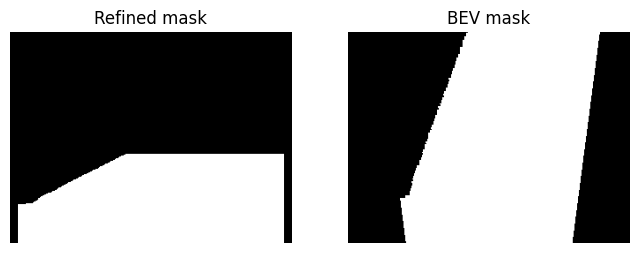

In [6]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.title('Refined mask')
plt.imshow(mask01, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('BEV mask')
plt.imshow(bev_mask, cmap='gray')
plt.axis('off')

plt.show()
